<font size=4>题目1：设想你是某门课程的教师，想通过学生平时和期末两次的评定成绩，来决定他们是否通过这门课程。现在你拥有之前学生的可以用于训练的样本集[data-1.txt](https://oc.sjtu.edu.cn/courses/66441/files/8598130?wrap=1) 。对于每一个训练样本，你有他们平时和期末评分及最后是通过课程的结果（1为通过，0为不通过）。请利用逻辑回归或支撑向量机方法建立分类器。</font>

In [1]:
import requests
import http.cookiejar as cookielib
import urllib3
import pandas as pd
import os

# close undesirable warnings
urllib3.disable_warnings()

# download my data from canvas
def request_data():
    userAgent  = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
    cookies = "_ga=GA1.3.612926324.1703474509; oc.sjtu.edu.cn=22632.57540.21071.0000; _gid=GA1.3.251492791.1709964939; _ga_QP6YR9D8CK=GS1.3.1709964940.3.0.1709964940.0.0.0; log_session_id=071b4507d9329edaf60cb29f80ec15cd; _legacy_normandy_session=f7BdnpGPmrgs5CJu3mCMOw+BFxPhjutwGI__T5nywh6EdUgrl8Cvfi3BFpbgbtHHtPCJNk7DPybRXwWqb2BtL5DsF6yvTZNFfU1EYSZU0Xj_OSQPWdO5hJIKUoz-M1dYIzqu4mNA85pcTG93eiVyMbxyTBM0YWrzw8jACvK-JRC1h2woQHksGlbHsJotRXygVdM6olkR4EBTmE5RH7pPGFV84MAMHZHQZpETJwwh1srvNC8fozkhyWQdbHu9gGaYPXN5s-V8YVHb8L-R7KZPbGTlkDMKICKj81V8GvCP0LxaZlmzA3NY_o1RbMCyT-tOZt-JK1nowwRqOhPH6BVLSinQuDoLYzrz21h6cGY5uGhUOKjulBJPxwoT6Jd44soH7KlZ9lxYTMVhPpuSKv_hk6SH6fCoXau8cCPwK6rGCIOgj8symgaGiP_QowwmA-yxRbyhIz3TxwAKp_MPWsLJNQfqFIpyfwji9pPUhuZvoUHS9-z-i_TSyeFelZSJV0xJeAdqM6Tg6LeOpIGZa9uHp7kJ6T-XQh4X7VaX_03zlrsSlGWYRJ_PHtDGiFcQe91UqFYtMlyJHSvYlYnaKwlruGL.vf5tibadhVXakYfERkrgpotadD0.ZewMrA; _normandy_session=f7BdnpGPmrgs5CJu3mCMOw+BFxPhjutwGI__T5nywh6EdUgrl8Cvfi3BFpbgbtHHtPCJNk7DPybRXwWqb2BtL5DsF6yvTZNFfU1EYSZU0Xj_OSQPWdO5hJIKUoz-M1dYIzqu4mNA85pcTG93eiVyMbxyTBM0YWrzw8jACvK-JRC1h2woQHksGlbHsJotRXygVdM6olkR4EBTmE5RH7pPGFV84MAMHZHQZpETJwwh1srvNC8fozkhyWQdbHu9gGaYPXN5s-V8YVHb8L-R7KZPbGTlkDMKICKj81V8GvCP0LxaZlmzA3NY_o1RbMCyT-tOZt-JK1nowwRqOhPH6BVLSinQuDoLYzrz21h6cGY5uGhUOKjulBJPxwoT6Jd44soH7KlZ9lxYTMVhPpuSKv_hk6SH6fCoXau8cCPwK6rGCIOgj8symgaGiP_QowwmA-yxRbyhIz3TxwAKp_MPWsLJNQfqFIpyfwji9pPUhuZvoUHS9-z-i_TSyeFelZSJV0xJeAdqM6Tg6LeOpIGZa9uHp7kJ6T-XQh4X7VaX_03zlrsSlGWYRJ_PHtDGiFcQe91UqFYtMlyJHSvYlYnaKwlruGL.vf5tibadhVXakYfERkrgpotadD0.ZewMrA; _csrf_token=XFyB%2FJT7jweN64DOo7%2FkMogQrqgLh1Y6pjvhA4KD%2BQURPbXO26PMMeKf77aV%2BKgC3iLr0TnfOVPOco1TyOutcw%3D%3D"
    header = {
        "Referer": "https://oc.sjtu.edu.cn/courses/66441/files",
        'User-Agent': userAgent,
        "Cookie": cookies,
    }
    # session代表某一次连接
    s = requests.session()
    url = 'https://oc.sjtu.edu.cn/courses/66441/files/8598130/download?download_frd=1'
    response = s.get(url, headers = header)
    if response.status_code == 200:
        print("Gat data!")
        with open("./data1.csv", "wb") as f:
            f.write(response.content)
        return True
    else:
        print("Data not found!")
        return False

Explore the statistics of the data.

In [2]:
# first check whether data is ready
if not os.path.isfile("./data1.csv"):
    print("Data not prepared! Preparing data...")
    if not request_data():
        raise RuntimeError("Data not prepared!")
    print("OK!")
# read data
df = pd.read_csv("./data1.csv", header=None)
df.columns = ["x1", "x2", "y"]
print(df.describe(include='all'))
label_nums = df['y'].value_counts()
# As we can see positive sample is more than the negative
print(f"\nNumber of label 1: {label_nums[1]}\nNumber of label 0: {label_nums[0]}")


               x1          x2           y
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000

Number of label 1: 60
Number of label 0: 40


Now we notice that the positive is more than the negative by <font color=red>20 samples</font>.

We continue to check if any outliers exist.

We draw boxplots.

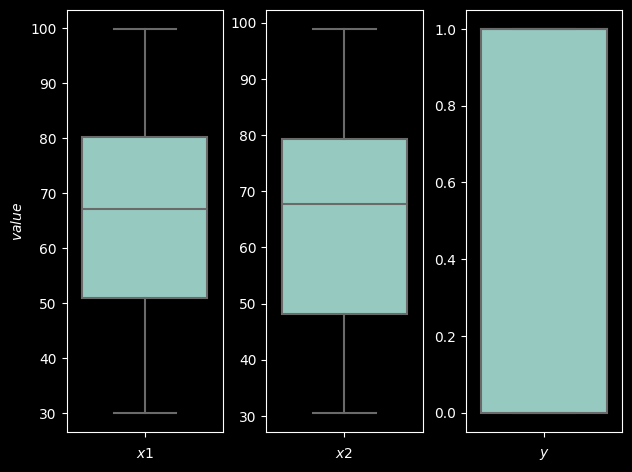

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=1)
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=(v), data=df, ax=axs[index])
    axs[index].set_xlabel("$"+k+"$")
    if index == 0:
        axs[index].set_ylabel("$value$")
    else:
        axs[index].set_ylabel("")
    index += 1
plt.tight_layout(pad=1, w_pad=0.5, h_pad=5.0)

As we can see, no outliers exist.

We continue to check if there are any highly correlated features.

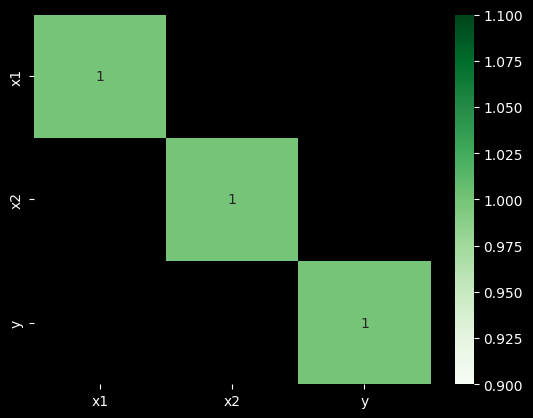

In [4]:
corrMatrix = df.corr(method="pearson")
# keep only high correlated items
highCorr = corrMatrix[corrMatrix >= .8]

# plot
sns.heatmap(highCorr, annot=True, cmap="Greens")
plt.show()

We use pearson correlation to calculate the correlation between features.

As above, no correlated features exist.

Now we draw the scatter plot of all features.

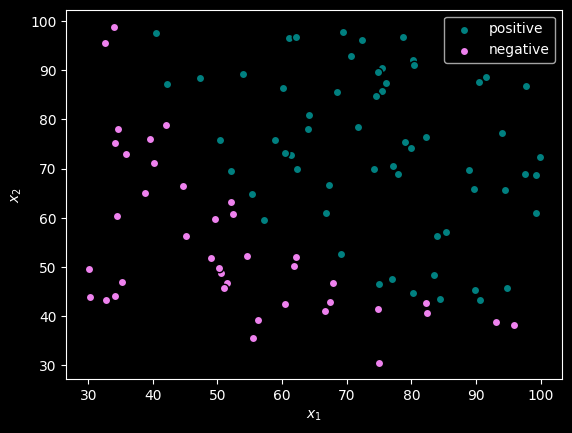

In [5]:
# plot the samples
pos = df[df['y'] == 1]
neg = df[df['y'] == 0]
s1 = plt.scatter(pos["x1"], pos["x2"], c="teal", edgecolors="k")
s2 = plt.scatter(neg["x1"], neg["x2"], c="violet", edgecolors="k")
plt.legend((s1, s2), ("positive", "negative"), loc='best')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

Now it's time to fit data.

Accuracy on test data: 0.933


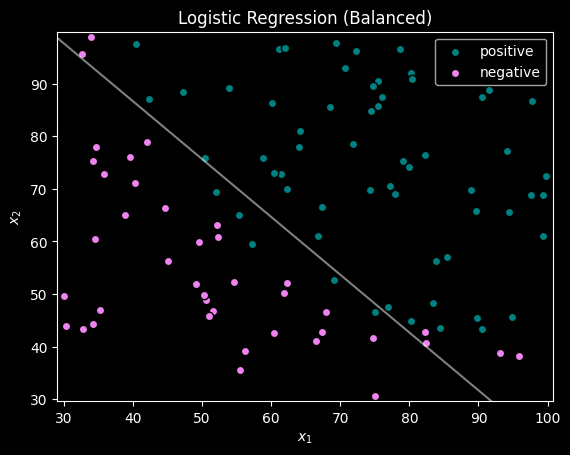

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

pos = df[df['y'] == 1]
neg = df[df['y'] == 0]
# to address the sample imbalance issue, 
# we fix 35 negatives and 35 positives to train our model, 
# reserve the rest of 30 for testing.
neg_train = neg.sample(35, random_state=47)
pos_train = pos.sample(35, random_state=47)
X_train = pd.concat([neg_train, pos_train])
# shuffle
X_train.sample(frac=1).reset_index(drop=True)
Y_train = X_train.pop('y')

neg_test = neg.drop(neg_train.index)
pos_test = pos.drop(pos_train.index)
X_test = pd.concat([neg_test, pos_test])
X_test.sample(frac=1).reset_index(drop=True)
Y_test = X_test.pop('y')


logreg_model = LogisticRegression(max_iter=1000, tol=1e-6)
trained_model = logreg_model.fit(X_train, Y_train)
print("Accuracy on test data: {:.3f}".format(trained_model.score(X_test, Y_test)))

s1 = plt.scatter(pos["x1"], pos["x2"], c="teal", edgecolors="k")
s2 = plt.scatter(neg["x1"], neg["x2"], c="violet", edgecolors="k")
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    trained_model,
    X_train,
    plot_method="contour",
    colors="w",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend((s1, s2), ("positive", "negative"), loc='best')
plt.title("Logistic Regression (Balanced)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

So, how is the decision boundary drawn?

Let's reproduce the plot above.

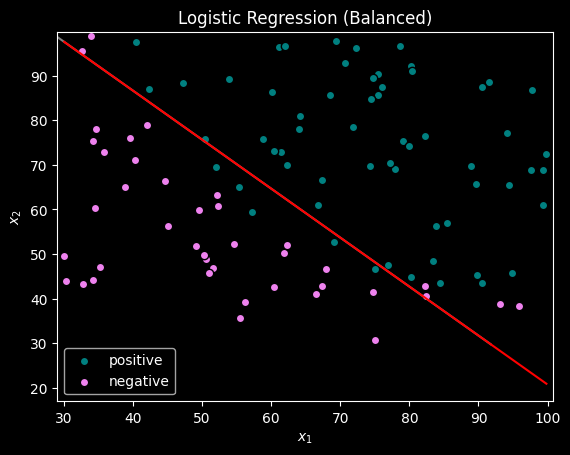

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

pos = df[df['y'] == 1]
neg = df[df['y'] == 0]
s1 = plt.scatter(pos["x1"], pos["x2"], c="teal", edgecolors="k")
s2 = plt.scatter(neg["x1"], neg["x2"], c="violet", edgecolors="k")
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    trained_model,
    X_train,
    plot_method="contour",
    colors="w",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

coef = trained_model.coef_
intercept = trained_model.intercept_
x1_vals = np.linspace(df["x1"].min(), df["x1"].max(), 100)
x2_vals = -(coef[0][0] * x1_vals + intercept) / coef[0][1]

plt.plot(x1_vals, x2_vals, "r-")
plt.legend((s1, s2), ("positive", "negative"), loc='best')
plt.title("Logistic Regression (Balanced)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

Apparently, we draw the same decision bounding as sklearn does. 

For comparision, we do not care about the imbalance issue, just randomly split the data.

Accuracy on test data: 0.867


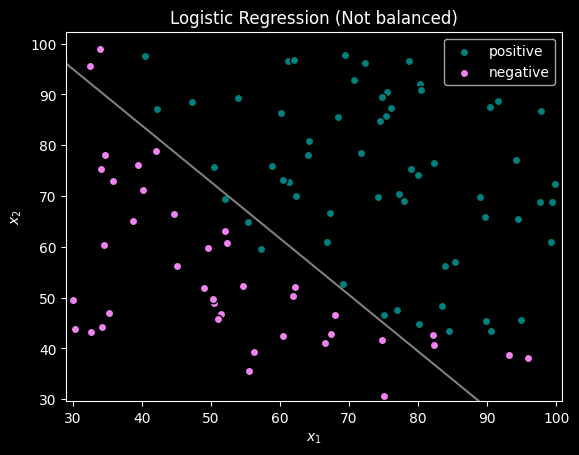

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Y = df['y']
X = df.drop(['y'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

logreg_model = LogisticRegression(max_iter=1000, tol=1e-6)
trained_model = logreg_model.fit(X_train, Y_train)
print("Accuracy on test data: {:.3f}".format(trained_model.score(X_test, Y_test)))

s1 = plt.scatter(pos["x1"], pos["x2"], c="teal", edgecolors="k")
s2 = plt.scatter(neg["x1"], neg["x2"], c="violet", edgecolors="k")
ax = plt.gca()

disp = DecisionBoundaryDisplay.from_estimator(
    trained_model,
    X_train,
    plot_method="contour",
    response_method="auto",
    colors="w",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend((s1, s2), ("positive", "negative"), loc='best')
plt.title("Logistic Regression (Not balanced)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

How about the performance if we use higher degree polynomial features?

Surprise! We get 100% accuracy!

Ref from [here](https://blog.csdn.net/xq151750111/article/details/121871627)

Accuracy on test data: 1.000


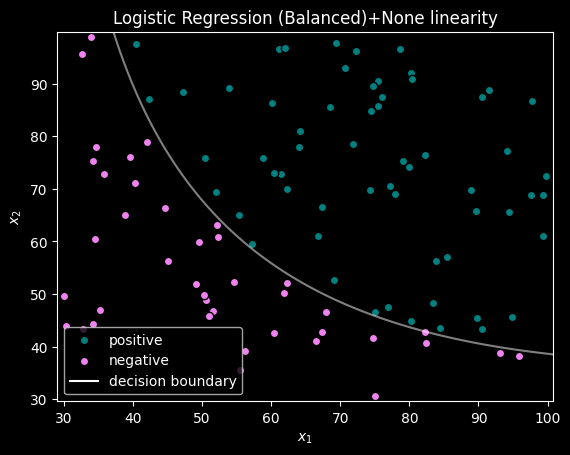

In [118]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.lines as mlines

pos = df[df['y'] == 1]
neg = df[df['y'] == 0]
# to address the sample imbalance issue, 
# we fix 35 negatives and 35 positives to train our model, 
# reserve the rest of 30 for testing.
neg_train = neg.sample(35, random_state=47)
pos_train = pos.sample(35, random_state=47)
X_train = pd.concat([neg_train, pos_train])
# shuffle
X_train.sample(frac=1).reset_index(drop=True)
Y_train = X_train.pop('y')

neg_test = neg.drop(neg_train.index)
pos_test = pos.drop(pos_train.index)
X_test = pd.concat([neg_test, pos_test])
X_test.sample(frac=1).reset_index(drop=True)
Y_test = X_test.pop('y')

pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=1000, tol=1e-6, C=100))
])

log_reg = pipeline.fit(X_train, Y_train)
print("Accuracy on test data: {:.3f}".format(log_reg.score(X_test, Y_test)))

s1 = plt.scatter(pos["x1"], pos["x2"], c="teal", edgecolors="k")
s2 = plt.scatter(neg["x1"], neg["x2"], c="violet", edgecolors="k")
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    log_reg,
    X_train,
    plot_method="contour",
    colors="w",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

legend_lines = mlines.Line2D([], [], color='w', label='decision boudary')

plt.legend((s1, s2, legend_lines), ("positive", "negative", "decision boundary"), loc='best')
plt.title("Logistic Regression (Balanced)+None linearity")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

How about SVM?

Ref [here](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)

Accuracy on test data: 0.967
Accuracy on test data: 0.867
Accuracy on test data: 0.900
Accuracy on test data: 0.967


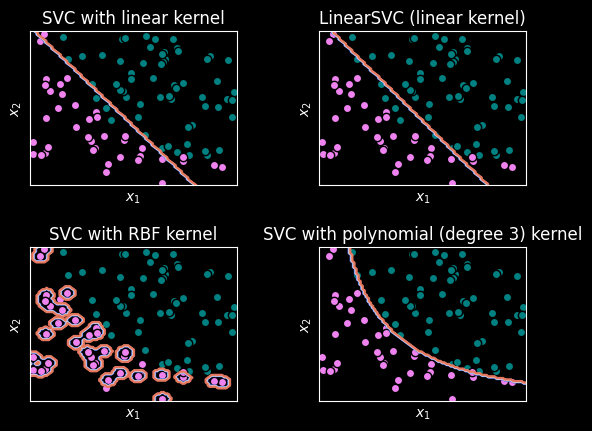

In [124]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

pos = df[df['y'] == 1]
neg = df[df['y'] == 0]
# to address the sample imbalance issue, 
# we fix 35 negatives and 35 positives to train our model, 
# reserve the rest of 30 for testing.
neg_train = neg.sample(35, random_state=47)
pos_train = pos.sample(35, random_state=47)
X_train = pd.concat([neg_train, pos_train])
# shuffle
X_train.sample(frac=1).reset_index(drop=True)
Y_train = X_train.pop('y')

neg_test = neg.drop(neg_train.index)
pos_test = pos.drop(pos_train.index)
X_test = pd.concat([neg_test, pos_test])
X_test.sample(frac=1).reset_index(drop=True)
Y_test = X_test.pop('y')

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.5, C=C),
    svm.SVC(kernel="poly", degree=2, gamma="auto", C=C),
)
models = [clf.fit(X_train, Y_train) for clf in models]

for model in models:
    print("Accuracy on test data: {:.3f}".format(model.score(X_test, Y_test))) 

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)


for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        plot_method = 'contour', 
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="$x_1$",
        ylabel="$x_2$",
    )
    s1 = ax.scatter(pos["x1"], pos["x2"], c="teal", edgecolors="k")
    s2 = ax.scatter(neg["x1"], neg["x2"], c="violet", edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()